## 1. DATASET CLEANING

The variable we want to predict is __price 💰__. So we do the following process to prepare data for the machine learning models to be able to train with it.

In [35]:
#Data management and visualization
import pandas as pd
import seaborn as sn

### 1.1. Getting a preliminary view at the data

In [22]:
data = pd.read_csv("input/diamonds_train.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [23]:
print(data.dtypes)
data.head()

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [24]:
data['cut'].value_counts()

Ideal        16141
Premium      10303
Very Good     9068
Good          3631
Fair          1202
Name: cut, dtype: int64

### 1.2. Renaming columns for further processing

In [25]:
data = data.set_index('id')

In [26]:
corte = {
    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1
    
}


data.cut.replace({
    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1
    
}, inplace=True)


data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,4,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [27]:
data['clarity'].value_counts()

SI1     9710
VS2     9164
SI2     6884
VS1     6092
VVS2    3839
VVS1    2738
IF      1357
I1       561
Name: clarity, dtype: int64

In [28]:
claritydic = {
    "IF":8,
    "VVS1":7,
    "VVS2":6,
    "VS1":5,
    "VS2":4,
    "SI1":3,
    "SI2":2,
    "I1":1
}
data.clarity=data.clarity.map(claritydic)

data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,4,F,5,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,D,3,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,F,3,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,E,6,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,J,3,61.4,55.0,5.58,5.62,3.44,1276


In [29]:
data['color'].value_counts()

G    8462
E    7292
F    7133
H    6200
D    5094
I    4094
J    2070
Name: color, dtype: int64

In [30]:
colores = {
    "J":10,
    "I":20,
    "H":30,
    "G":40,
    "F":50,
    "E":60,
    "D":70,       
}

data.color=data.color.map(colores)

data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [31]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,4,50,5,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,70,3,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,50,3,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,60,6,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,10,3,61.4,55.0,5.58,5.62,3.44,1276


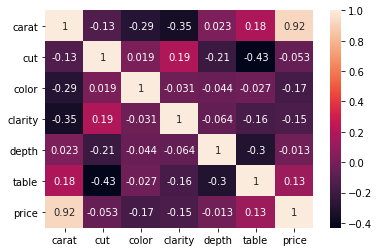

In [32]:
#Sizes are tightly related to the weigth, so we'll consider it redundant information.

data.drop(['x', 'y', 'z'], axis=1, inplace=True)
corre = data.corr()
sn.heatmap(corre, annot=True)

In [14]:
data['price'].mean()

3931.902243152807

In [15]:
data['price'].median()

2397.0

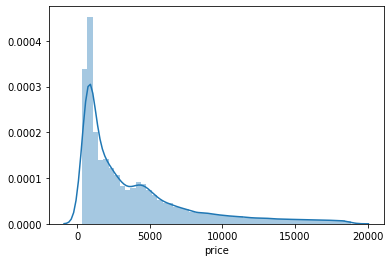

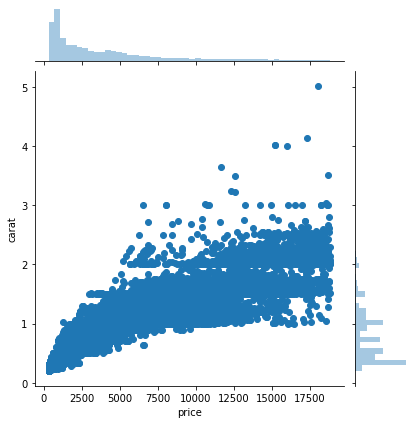

In [34]:
#How is price (what we aim to predict) and carats related?

sn.distplot(data['price'])
sn.jointplot(x="price", y="carat", data=data)

In [17]:
data.to_csv("output/clean_data_train.csv")

###  Once the data is clean, let's jump right into the ML models! ➡️ [2. Exploring different ML models](https://github.com/breogann/Project-5.Machine-learning-algorithm-selection/blob/master/2.%20Exploring%20different%20ML%20models.ipynb)